# Text Mining_(Elon_Musk)

In [7]:
import pandas as pd
import numpy as np
import string
import spacy
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!pip install spacy

In [11]:
musk= pd.read_csv(r"C:\Users\mrmri\Downloads\Assignments Excelr\Text Mining\Elon_musk.csv",encoding='latin-1',index_col=[0])

In [12]:
musk

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrmri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrmri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrmri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [16]:
def clean_text(text):
    
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text)) #To remove #
    text=re.sub('RT[\s]+','',str(text)) #To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    text=text.translate(str.maketrans('', '', string.punctuation))

    return text

musk['Text']=musk["Text"].apply(clean_text)
musk

,Text
1,im an alien
2,aacarmack ray tracing on cyberpunk with hdr is...
3,great interview
4,doge is underestimated
5,congratulations tesla china for amazing execu...
...,...
1995,true it sounds so surreal but the negative pr...
1996,make sure to read ur terms amp conditions bef...
1997,samwise gamgee
1998,altho dumb and dumber is u0001f525u0001f525


In [17]:
elon=musk.Text
elon_string=" ".join(elon)
elon_string

' i\x92m an alien aacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it   great interview  doge is underestimated  congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge\nall thought he would fail\nhimself most of all     haha thanks    indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely  just sent some just agree to do clubhouse with     it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler  he definitely has issues but the sentencing seems a bit high  thanks for fixing  please unlock my account  u0001f923u0001f923 this is true power haha   any crypto wallet that won\x92t give you your private keys should be avoided at all costs  your app sucks  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission \x85  yes    once we can predict c

In [18]:
text_tokens=word_tokenize(elon_string)
print(text_tokens)

['i\x92m', 'an', 'alien', 'aacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'it\x92s', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 'for', 'fixing', 'p

In [22]:
with open (r"C:\Users\mrmri\Downloads\Assignments Excelr\Text Mining\stop.txt") as sw:
    stop_words=sw.read()
stop_words=stop_words.split('\n') 

In [23]:
musk_no_sw=[word for word in text_tokens if word not in stop_words]
musk_no_sw

['i\x92m',
 'alien',
 'aacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'thought',
 'fail',
 'haha',
 'tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'agree',
 'clubhouse',
 'it\x92s',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'issues',
 'sentencing',
 'bit',
 'high',
 'fixing',
 'unlock',
 'account',
 'u0001f923u0001f923',
 'true',
 'power',
 'haha',
 'crypto',
 'wallet',
 'won\x92t',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'app',
 'sucks',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',
 'elements',
 'lunar',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'starlink',
 'ipo',
 'starlink',
 'staggeringly',
 'difficult',
 'technical',
 'amp',
 'economic',
 'endeavor',
 'don',
 'spacex',
 'pass',
 'dee

In [24]:
tf=TfidfVectorizer()
text_tf=tf.fit_transform(musk_no_sw)

In [25]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)
df

,005,10,100,1000,10000,100kg,100m,107,10pm,10x,...,zealand,zenit,zeroes,zeros,zimon,zip2,zon,zone,zpalmer,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
wordslist=" ".join(df)

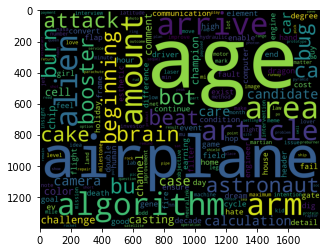

In [27]:
wordcloud=WordCloud(background_color='black',width=1800,height=1400).generate(wordslist)
plt.imshow(wordcloud)

In [28]:
with open(r"C:\Users\mrmri\Downloads\Assignments Excelr\Text Mining\positive-words.txt") as pos:
    positive=pos.read().split("\n")

In [29]:
positive_words=positive[35:]

In [30]:
positive_tweet=" ".join([word for word in df if word in positive_words])
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(positive_tweet)

In [31]:
with open (r"C:\Users\mrmri\Downloads\Assignments Excelr\Text Mining\negative-words.txt") as neg:
    negative=neg.read().split("\n")
negative_words=negative[35:]    

In [32]:
negative_tweets=" ".join([word for word in df if word in negative_words])

In [33]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(negative_tweets)

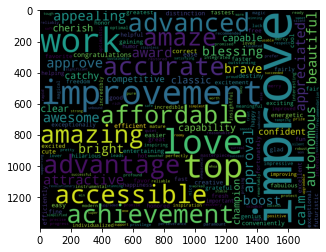

In [34]:
plt.imshow(pos_wordcloud)

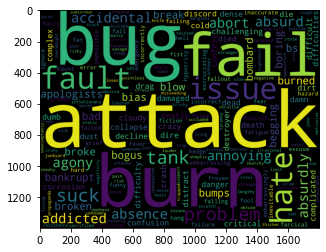

In [35]:
plt.imshow(neg_wordcloud)


In [39]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

musk[["subjectivity", "polarity"]] = musk.apply(sentiment_analysis, axis=1)
musk

,Text,subjectivity,polarity
1,im an alien,0.750000,-0.250000
2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000
3,great interview,0.750000,0.800000
4,doge is underestimated,0.000000,0.000000
5,congratulations tesla china for amazing execu...,0.366667,0.275000
...,...,...,...
1995,true it sounds so surreal but the negative pr...,0.508333,0.111111
1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000
1997,samwise gamgee,0.000000,0.000000
1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000


In [40]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
musk["analysis"] = musk["polarity"].apply(analysis)
musk

,Text,subjectivity,polarity,analysis
1,im an alien,0.750000,-0.250000,Negative
2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000,Neutral
3,great interview,0.750000,0.800000,Positive
4,doge is underestimated,0.000000,0.000000,Neutral
5,congratulations tesla china for amazing execu...,0.366667,0.275000,Positive
...,...,...,...,...
1995,true it sounds so surreal but the negative pr...,0.508333,0.111111,Positive
1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000,Positive
1997,samwise gamgee,0.000000,0.000000,Neutral
1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000,Negative


In [41]:
musk["analysis"].value_counts()

Neutral     898
Positive    881
Negative    220
Name: analysis, dtype: int64

In [42]:
#positive musk
(1779/1999)*100

88.99449724862431

In [43]:
#negative musk
(220/1999)*100

11.005502751375689

# Text_Mining(Amazon_Mens-Polo)

In [44]:
!pip install selenium

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [46]:
mens_polo=[]

In [49]:
for i in range (1,41):
    mens=[]
    url="https://www.amazon.in/product-reviews/B09NDDVSNN/ref=acr_dp_hist_1?ie=UTF8&filterByStar=one_star&reviewerType=all_reviews"+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mens.append(reviews[i].text)
    mens_polo=mens_polo+mens

In [50]:
mens_polo

["\nI'm really shocked to receive this poor quality products from Amazon. The fitting was good but the product quality was poorer tham one can think of even fake allen solly t-shirt are of better quality than this. I received it in one colour but after one wash it has become of three shades. It lost a lot of colour after first and further washes. I regret buying this product and i wish i could undo that.\n",
 "\nI purchased two tee shirts of same size and same brand at same time; One is yellow and one is Navy Blue.I am giving 100 / 100 to yellow one whereas 50 / 100 to Navy Blue.Navy Blue one doesn't fit me, it's too tight. Uncomfortable. And leaving color also. So better to return.Pls suggest is I can return the product after wash.\n",
 "\nThis tshirt material is a total waste. I presume it's a low quality or rejected orders. On the first day of wearing this tshirt I carry a backpack. Evening I found so many pulls and snags everywhere on the shoulder side of this tshirt.\n",
 '\nI hav

In [51]:
len(mens_polo)

280

In [52]:
rev={"review":mens_polo}

In [53]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [54]:
review_data

,review
0,\nI'm really shocked to receive this poor quality products from Amazon. The fitting was good but the product quality was poorer tham one can think of even fake allen solly t-shirt are of better quality than this. I received it in one colour but after one wash it has become of three shades. It lost a lot of colour after first and further washes. I regret buying this product and i wish i could undo that.\n
1,"\nI purchased two tee shirts of same size and same brand at same time; One is yellow and one is Navy Blue.I am giving 100 / 100 to yellow one whereas 50 / 100 to Navy Blue.Navy Blue one doesn't fit me, it's too tight. Uncomfortable. And leaving color also. So better to return.Pls suggest is I can return the product after wash.\n"
2,\nThis tshirt material is a total waste. I presume it's a low quality or rejected orders. On the first day of wearing this tshirt I carry a backpack. Evening I found so many pulls and snags everywhere on the shoulder side of this tshirt.\n
3,"\nI have many Allen Solly tees and all of them had one problem of color fading in sun. They are good if you you just remains indoors but if you go outside in sun, color starts to fade due to sun rays. They should change their color dye. Btw I followed the washing instructions.\n"
4,"\nI got two t-shirts of same size and i got two different sizes but both are labelled as medium. ( You can observe in attached pic). So i got doubt as it is not possible with original allen solly branded clothes. So after checking, i got to know that those both are fake allen solly. Im returning those.Now im buying from allen solly official website where im getting 51% off.\n"
...,...
275,"\n\n\n\n\n The media could not be loaded.\n \n\n\n\n It is very poor quality, after a few time washes, it has become completely different, it has become a mark of blemish, no one has to take this Tshirt of Alan Solly. Please check i have upload a video\n"
276,\nIn first wash the colour of the blue band stiched on the inner side of the neck came out and got spread on various parts of the shirt...looks so bad and turned the shirt useless. Can't even return as it requires original price tag etc which I didn't save ...as I never expected it to happen..disappointed and helpless\n
277,\nThe product I have ordered sea green looks good in photo ..but when I recieved looking different colour I m v.disappointed from this ...I never expected from Amazon ...this is second time happening ..and also size is very loose ....... previously I wore xl it was fit to me but this item seems to be duplicate ...I think you people not cunning us.....we are very confident on allensolly ...but not on Amazon ....\n
278,\nProduct was good. Can I think not original company shirt. It's masters edition for brand.. Amazon was cheat the publish behind the discount game.😡😠😠😡😡😡😡😡😡 I am asking showroom man about this..he told to me Original company cannot give in that low price...\n


In [55]:
text=" ".join(review_data)

In [56]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [57]:
review_data

,review
0,\ni'm really shocked to receive this poor quality products from amazon. the fitting was good but the product quality was poorer tham one can think of even fake allen solly t-shirt are of better quality than this. i received it in one colour but after one wash it has become of three shades. it lost a lot of colour after first and further washes. i regret buying this product and i wish i could undo that.\n
1,"\ni purchased two tee shirts of same size and same brand at same time; one is yellow and one is navy blue.i am giving 100 / 100 to yellow one whereas 50 / 100 to navy blue.navy blue one doesn't fit me, it's too tight. uncomfortable. and leaving color also. so better to return.pls suggest is i can return the product after wash.\n"
2,\nthis tshirt material is a total waste. i presume it's a low quality or rejected orders. on the first day of wearing this tshirt i carry a backpack. evening i found so many pulls and snags everywhere on the shoulder side of this tshirt.\n
3,"\ni have many allen solly tees and all of them had one problem of color fading in sun. they are good if you you just remains indoors but if you go outside in sun, color starts to fade due to sun rays. they should change their color dye. btw i followed the washing instructions.\n"
4,"\ni got two t-shirts of same size and i got two different sizes but both are labelled as medium. ( you can observe in attached pic). so i got doubt as it is not possible with original allen solly branded clothes. so after checking, i got to know that those both are fake allen solly. im returning those.now im buying from allen solly official website where im getting 51% off.\n"
...,...
275,"\n the media could not be loaded.\n it is very poor quality, after a few time washes, it has become completely different, it has become a mark of blemish, no one has to take this tshirt of alan solly. please check i have upload a video\n"
276,\nin first wash the colour of the blue band stiched on the inner side of the neck came out and got spread on various parts of the shirt...looks so bad and turned the shirt useless. can't even return as it requires original price tag etc which i didn't save ...as i never expected it to happen..disappointed and helpless\n
277,\nthe product i have ordered sea green looks good in photo ..but when i recieved looking different colour i m v.disappointed from this ...i never expected from amazon ...this is second time happening ..and also size is very loose ....... previously i wore xl it was fit to me but this item seems to be duplicate ...i think you people not cunning us.....we are very confident on allensolly ...but not on amazon ....\n
278,\nproduct was good. can i think not original company shirt. it's masters edition for brand.. amazon was cheat the publish behind the discount game.😡😠😠😡😡😡😡😡😡 i am asking showroom man about this..he told to me original company cannot give in that low price...\n


In [58]:
text=" ".join(review_data["review"])

In [59]:
text

"\ni'm really shocked to receive this poor quality products from amazon. the fitting was good but the product quality was poorer tham one can think of even fake allen solly t-shirt are of better quality than this. i received it in one colour but after one wash it has become of three shades. it lost a lot of colour after first and further washes. i regret buying this product and i wish i could undo that.\n \ni purchased two tee shirts of same size and same brand at same time; one is yellow and one is navy blue.i am giving 100 / 100 to yellow one whereas 50 / 100 to navy blue.navy blue one doesn't fit me, it's too tight. uncomfortable. and leaving color also. so better to return.pls suggest is i can return the product after wash.\n \nthis tshirt material is a total waste. i presume it's a low quality or rejected orders. on the first day of wearing this tshirt i carry a backpack. evening i found so many pulls and snags everywhere on the shoulder side of this tshirt.\n \ni have many allen 

In [60]:
text_tokens = word_tokenize(text)

In [61]:
text_tokens

['i',
 "'m",
 'really',
 'shocked',
 'to',
 'receive',
 'this',
 'poor',
 'quality',
 'products',
 'from',
 'amazon',
 '.',
 'the',
 'fitting',
 'was',
 'good',
 'but',
 'the',
 'product',
 'quality',
 'was',
 'poorer',
 'tham',
 'one',
 'can',
 'think',
 'of',
 'even',
 'fake',
 'allen',
 'solly',
 't-shirt',
 'are',
 'of',
 'better',
 'quality',
 'than',
 'this',
 '.',
 'i',
 'received',
 'it',
 'in',
 'one',
 'colour',
 'but',
 'after',
 'one',
 'wash',
 'it',
 'has',
 'become',
 'of',
 'three',
 'shades',
 '.',
 'it',
 'lost',
 'a',
 'lot',
 'of',
 'colour',
 'after',
 'first',
 'and',
 'further',
 'washes',
 '.',
 'i',
 'regret',
 'buying',
 'this',
 'product',
 'and',
 'i',
 'wish',
 'i',
 'could',
 'undo',
 'that',
 '.',
 'i',
 'purchased',
 'two',
 'tee',
 'shirts',
 'of',
 'same',
 'size',
 'and',
 'same',
 'brand',
 'at',
 'same',
 'time',
 ';',
 'one',
 'is',
 'yellow',
 'and',
 'one',
 'is',
 'navy',
 'blue.i',
 'am',
 'giving',
 '100',
 '/',
 '100',
 'to',
 'yellow',
 'one

In [62]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [63]:
tf=TfidfVectorizer()

In [64]:
text_tf=tf.fit_transform(text_without_sw)

In [65]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [66]:
df

,100,50,51,alan,allensolly,amazon,asking,attached,average,backpack,...,washes,washing,waste,wearing,website,whereas,wish,wore,xl,yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9908,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
words_list=" ".join(df)

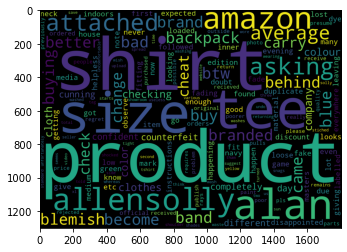

In [68]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [69]:
with open (r"C:\Users\mrmri\Downloads\Assignments Excelr\Text Mining\positive-words.txt") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [70]:
with open (r"C:\Users\mrmri\Downloads\Assignments Excelr\Text Mining\negative-words.txt") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:] 

In [71]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [72]:
pos_text=" ".join([word for word in df if not word  in positive_words])

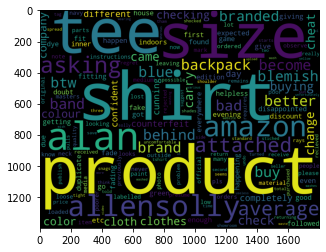

In [73]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

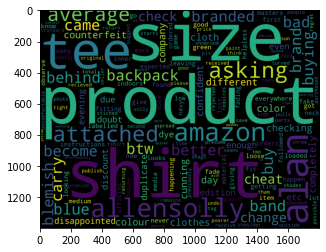

In [74]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [82]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,\ni'm really shocked to receive this poor quality products from amazon. the fitting was good but the product quality was poorer tham one can think of even fake allen solly t-shirt are of better quality than this. i received it in one colour but after one wash it has become of three shades. it lost a lot of colour after first and further washes. i regret buying this product and i wish i could undo that.\n,0.604167,0.043750
1,"\ni purchased two tee shirts of same size and same brand at same time; one is yellow and one is navy blue.i am giving 100 / 100 to yellow one whereas 50 / 100 to navy blue.navy blue one doesn't fit me, it's too tight. uncomfortable. and leaving color also. so better to return.pls suggest is i can return the product after wash.\n",0.266071,0.022143
2,\nthis tshirt material is a total waste. i presume it's a low quality or rejected orders. on the first day of wearing this tshirt i carry a backpack. evening i found so many pulls and snags everywhere on the shoulder side of this tshirt.\n,0.376667,0.110000
3,"\ni have many allen solly tees and all of them had one problem of color fading in sun. they are good if you you just remains indoors but if you go outside in sun, color starts to fade due to sun rays. they should change their color dye. btw i followed the washing instructions.\n",0.381250,0.268750
4,"\ni got two t-shirts of same size and i got two different sizes but both are labelled as medium. ( you can observe in attached pic). so i got doubt as it is not possible with original allen solly branded clothes. so after checking, i got to know that those both are fake allen solly. im returning those.now im buying from allen solly official website where im getting 51% off.\n",0.695000,-0.025000
...,...,...,...
275,"\n the media could not be loaded.\n it is very poor quality, after a few time washes, it has become completely different, it has become a mark of blemish, no one has to take this tshirt of alan solly. please check i have upload a video\n",0.493333,-0.240000
276,\nin first wash the colour of the blue band stiched on the inner side of the neck came out and got spread on various parts of the shirt...looks so bad and turned the shirt useless. can't even return as it requires original price tag etc which i didn't save ...as i never expected it to happen..disappointed and helpless\n,0.389583,-0.065625
277,\nthe product i have ordered sea green looks good in photo ..but when i recieved looking different colour i m v.disappointed from this ...i never expected from amazon ...this is second time happening ..and also size is very loose ....... previously i wore xl it was fit to me but this item seems to be duplicate ...i think you people not cunning us.....we are very confident on allensolly ...but not on amazon ....\n,0.451667,0.133333
278,\nproduct was good. can i think not original company shirt. it's masters edition for brand.. amazon was cheat the publish behind the discount game.😡😠😠😡😡😡😡😡😡 i am asking showroom man about this..he told to me original company cannot give in that low price...\n,0.620000,0.097500


In [83]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,\ni'm really shocked to receive this poor quality products from amazon. the fitting was good but the product quality was poorer tham one can think of even fake allen solly t-shirt are of better quality than this. i received it in one colour but after one wash it has become of three shades. it lost a lot of colour after first and further washes. i regret buying this product and i wish i could undo that.\n,0.604167,0.043750,Positive
1,"\ni purchased two tee shirts of same size and same brand at same time; one is yellow and one is navy blue.i am giving 100 / 100 to yellow one whereas 50 / 100 to navy blue.navy blue one doesn't fit me, it's too tight. uncomfortable. and leaving color also. so better to return.pls suggest is i can return the product after wash.\n",0.266071,0.022143,Positive
2,\nthis tshirt material is a total waste. i presume it's a low quality or rejected orders. on the first day of wearing this tshirt i carry a backpack. evening i found so many pulls and snags everywhere on the shoulder side of this tshirt.\n,0.376667,0.110000,Positive
3,"\ni have many allen solly tees and all of them had one problem of color fading in sun. they are good if you you just remains indoors but if you go outside in sun, color starts to fade due to sun rays. they should change their color dye. btw i followed the washing instructions.\n",0.381250,0.268750,Positive
4,"\ni got two t-shirts of same size and i got two different sizes but both are labelled as medium. ( you can observe in attached pic). so i got doubt as it is not possible with original allen solly branded clothes. so after checking, i got to know that those both are fake allen solly. im returning those.now im buying from allen solly official website where im getting 51% off.\n",0.695000,-0.025000,Negative
...,...,...,...,...
275,"\n the media could not be loaded.\n it is very poor quality, after a few time washes, it has become completely different, it has become a mark of blemish, no one has to take this tshirt of alan solly. please check i have upload a video\n",0.493333,-0.240000,Negative
276,\nin first wash the colour of the blue band stiched on the inner side of the neck came out and got spread on various parts of the shirt...looks so bad and turned the shirt useless. can't even return as it requires original price tag etc which i didn't save ...as i never expected it to happen..disappointed and helpless\n,0.389583,-0.065625,Negative
277,\nthe product i have ordered sea green looks good in photo ..but when i recieved looking different colour i m v.disappointed from this ...i never expected from amazon ...this is second time happening ..and also size is very loose ....... previously i wore xl it was fit to me but this item seems to be duplicate ...i think you people not cunning us.....we are very confident on allensolly ...but not on amazon ....\n,0.451667,0.133333,Positive
278,\nproduct was good. can i think not original company shirt. it's masters edition for brand.. amazon was cheat the publish behind the discount game.😡😠😠😡😡😡😡😡😡 i am asking showroom man about this..he told to me original company cannot give in that low price...\n,0.620000,0.097500,Positive


In [84]:
review_data['analysis'].value_counts()

Positive    168
Negative    112
Name: analysis, dtype: int64

In [85]:
#positive comments
(168/280)*100

60.0

In [86]:
#negative comments
(112/280)*100

40.0